In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install scikit-learn

In [ ]:
pip install matplotlib

In [17]:
import numpy as np
import pandas as pd

In [18]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
y_train = train_data['Survived']
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features], dtype='float32')
X_test = pd.get_dummies(test_data[['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch']], dtype='float32')
X_test

,PassengerId,Pclass,SibSp,Parch,Sex_female,Sex_male
0,892,3,0,0,0.0,1.0
1,893,3,1,0,1.0,0.0
2,894,2,0,0,0.0,1.0
3,895,3,0,0,0.0,1.0
4,896,3,1,1,1.0,0.0
...,...,...,...,...,...,...
413,1305,3,0,0,0.0,1.0
414,1306,1,0,0,1.0,0.0
415,1307,3,0,0,0.0,1.0
416,1308,3,0,0,0.0,1.0


In [20]:
X_train_array = X_train.values
X_test_array = X_test[['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Sex_male']].values

In [21]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

In [22]:
y_train_categorical = to_categorical(y_train.values)

In [23]:
model = Sequential([
    Dense(4, input_shape=(5,), activation=tf.keras.activations.relu),
    Dense(2, activation=tf.keras.activations.softmax)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.mean_squared_error, metrics=tf.keras.metrics.categorical_accuracy)

In [24]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train_array)

In [ ]:
learning = model.fit(X_train_norm[..., np.newaxis], y_train_categorical, epochs=100, validation_split=0.2)

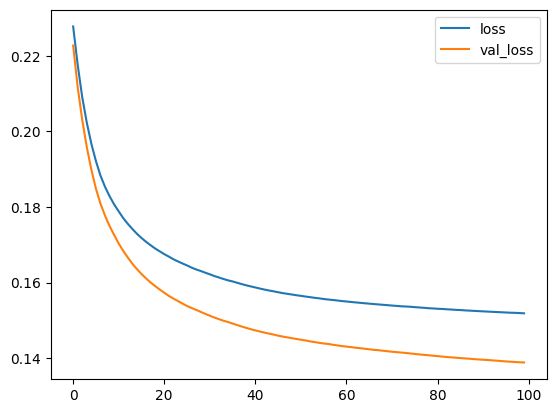

In [26]:
import matplotlib.pyplot as plt

plt.plot(learning.history['loss'], label='loss')
plt.plot(learning.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
X_test_norm = mms.transform(X_test_array)
prediction = model.predict(X_test_norm[..., np.newaxis])

In [28]:
labels = np.argmax(prediction, axis=1)

In [29]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': labels})

In [30]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [31]:
output.to_csv('submission.csv', index=False)

In [72]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]